# Betting odds and outcome of UFC fights from 2010-2020

Author: Marcus Lei

Course Project, UC Irvine, Math 10, S22

## Introduction

This project uses fighting data and betting odds of UFC events recorded from 2010-2020. From this project, I am looking to explore how betting odds are determined. I am also hoping to also explore fights where the outcomes are upsets, in which the betting favorite does not win, and the betting odds for those events. In addition, it would be interesting to understand more about where the UFC hosts events and the weightclasses with the most fights. 


## Main portion of the project



In [ ]:
#Importing the necessary libraries and functions
import pandas as pd
import altair as alt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Reading the dataset
df = pd.read_csv("data.csv")

In [ ]:
df.head()

R_fighter         B_fighter  R_odds  B_odds       date  \
0           Kevin Lee  Charles Oliveira  -145.0   135.0  3/14/2020   
1         Demian Maia     Gilbert Burns   160.0  -170.0  3/14/2020   
2      Renato Moicano    Damir Hadzovic  -345.0   315.0  3/14/2020   
3       Johnny Walker     Nikita Krylov  -137.0   127.0  3/14/2020   
4  Francisco Trinaldo     John Makdessi  -160.0   150.0  3/14/2020   

                             location country Winner title_bout  \
0  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
1  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
2  Brasilia, Distrito Federal, Brazil  Brazil    Red      False   
3  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
4  Brasilia, Distrito Federal, Brazil  Brazil    Red      False   

        weight_class gender  
0        Lightweight   MALE  
1       Welterweight   MALE  
2        Lightweight   MALE  
3  Light Heavyweight   MALE  
4        Lightweight   MALE

### Introduction to the Dataset


This dataset is about UFC fights from March 21, 2010 to March 14, 2020. The first two columns are the names of the fighters in the red and blue corner, respectively. The color of the corner does not hold much significance, rather it just allows viewers to understand what side of the octagon a fighter starts at. The column "R_odds" represents the betting odds of the red fighter winning the fight and the "B_odds" column. We then also have the date, location, gender, weightclass and whether the fight was for a world championship title. 



#### A guide to betting odds

To those unfamiliar with understanding a betting line, this section will explain a method to understand it. The numbers are displayed in a way known as "American odds". As described by investopedia.com, money line odds (aka “American” odds or “U.S.” odds) are popular in the United States. The odds for favorites are accompanied by a minus (-) sign and indicate the amount you need to stake to win $100. The odds for underdogs, on the other hand, are accompanied by a positive(+) sign and indicate the amount won for every 100 dollars staked. The difference between the odds for the favorite and the underdog widens as the probability of winning for the favorite increases.

In both cases, winners get their initial wager back in addition to the amount won. The difference between the odds for the favorite and the underdog widens as the probability of winning for the favorite increases"


### Organizing the dataset


In [ ]:
#Cleaning up the data set
#Picking up the wrongs that do not contain missing values
df = df[~df.isna().any(axis=1)]

In [ ]:
df = df.rename({"weight_class": "Weight Class", "title_bout": "Title Bout"},axis=1)

In [ ]:
#Since this dataframe does not contain the name of the winner, let's add that
df["Name of Winner"] = 0
for x in df.index:
    if df.loc[x,"Winner"] == "Blue":
        df.loc[x,"Name of Winner"] = df.loc[x,"B_fighter"]
    elif df.loc[x,"Winner"] == "Red":
        df.loc[x,"Name of Winner"] = df.loc[x,"R_fighter"]
    elif df.loc[x,"Winner"] == "Draw":
        df.loc[x,"Name of Winner"] = "Draw"

In [ ]:
#Add whether the outcome was an upset or not
#An upset is defined as when the betting favorite loses
#In the case that the betting odds indicate no favorite, we will label it as "No favorite"
#We will also add a numerical column representing the outcome where 0= Draw, 1= Upset , -1= No upset
df["Betting Result"] = 0
df["Num result"] = 0 
for x in df.index:
    if df.loc[x,"R_odds"] < df.loc[x,"B_odds"]:
        if df.loc[x,"Winner"] == "Red":
            df.loc[x,"Betting Result"] = "No Upset"
            df.loc[x,"Num result"] = -1
        elif df.loc[x,"Winner"] == "Blue":
            df.loc[x,"Betting Result"] = "Upset"
            df.loc[x,"Num result"] = 1
        else:
            df.loc[x,"Betting Result"] = "Draw"
            df.loc[x,"Num result"] = 0
    elif df.loc[x,"R_odds"] > df.loc[x,"B_odds"]:
        if df.loc[x,"Winner"] == "Red":
            df.loc[x,"Betting Result"] = "Upset"
            df.loc[x,"Num result"] = 1
        elif df.loc[x,"Winner"] == "Blue":
            df.loc[x,"Betting Result"] = "No Upset"
            df.loc[x,"Num result"] = -1
        else:
            df.loc[x,"Betting Result"] = "Draw"
            df.loc[x,"Num result"] = 0
    elif df.loc[x,"R_odds"] == df.loc[x,"B_odds"]:
        df.loc[x,"Betting Result"] = "No Favorite"
        df.loc[x,"Num result"] = 0

I considered using functions and maps to make the loop above more pythonnic, but could not think of a method.

When I inspected the country column, some countries have an empty space before the first letter. I will be removing the spaces between the first letter and the 0th index.

In [ ]:
def removespace(n):
    if n[0] == " ":
        s = n.split(" ")[1]
        return s
    else:
        return n

In [ ]:
df["country"] = df["country"].map(removespace)

Some countries do not have their full country name listed under the country column, such as South Korea being listed as "South". I will be editing the country column in order to have the full country name recorded.

In [ ]:
def fullname(c):
    if c == "United":
        return "United Arab Emirates"
    elif c == "New":
        return "New Zealand"
    elif c == "South":
        return "South Korea"
    else:
        return c
df["country"] = df["country"].map(fullname)

In [ ]:
df.head()

R_fighter         B_fighter  R_odds  B_odds       date  \
0           Kevin Lee  Charles Oliveira  -145.0   135.0  3/14/2020   
1         Demian Maia     Gilbert Burns   160.0  -170.0  3/14/2020   
2      Renato Moicano    Damir Hadzovic  -345.0   315.0  3/14/2020   
3       Johnny Walker     Nikita Krylov  -137.0   127.0  3/14/2020   
4  Francisco Trinaldo     John Makdessi  -160.0   150.0  3/14/2020   

                             location country Winner Title Bout  \
0  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
1  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
2  Brasilia, Distrito Federal, Brazil  Brazil    Red      False   
3  Brasilia, Distrito Federal, Brazil  Brazil   Blue      False   
4  Brasilia, Distrito Federal, Brazil  Brazil    Red      False   

        Weight Class gender      Name of Winner Betting Result  Num result  
0        Lightweight   MALE    Charles Oliveira          Upset           1  
1       Welterweight   MALE       Gilbert Burns       No Upset          -1  
2        Lightweight   MALE      Renato Moicano       No Upset          -1  
3  Light Heavyweight   MALE       Nikita Krylov          Upset           1  
4        Lightweight   MALE  Francisco Trinaldo       No Upset          -1

Given that there is a significantly larger sample size(3854 mes events versus 386 womens events) for the mens events, I will split the dataset into mens and womens events. From now on, I will be focusing on the mens dataset as there is a larger sample and it is also the division in which I am a viewer of.

In [ ]:
#We now split the data into mens and womens
df_mens = df[df["gender"] == "MALE"].copy()
df_womens = df[df["gender"] == "FEMALE"].copy()

In [ ]:
#For convenience sake, I will be using renaming df_mens as df
df = df_mens.copy()

## Exploring the dataset 

### What weight division is the most popular?

In [ ]:
alt.Chart(df).mark_bar().encode(x=alt.X("Weight Class", title = "Weight Classes"), y=alt.Y("count(Weight Class)", title = "Amount of fights"))

alt.Chart(...)

From the bar chart, we can tell that the weight classes lightweight (146lb-155lb) and welterweight (156lb-170lb).This makes intuitive sense as I would expect the median weight of male fighters to be around these two weight classes. Catch weight appears as an outlier as catchweight is not an actual weightclass but a type of fight created when a fighter fails to weigh in at their predetermined weightclass.

The UFC takes pride in being an international sport, I want to explore the different countries outside of the United States it hosts fights at.

In [ ]:
#Filter out the events that were hosted outside of USA
df_non_usa = df[~(df["country"] == "USA")].copy()

In [ ]:
alt.Chart(df_non_usa).mark_bar().encode(x=alt.X("country:N", title = "Countries"), y=alt.Y("count(country)", title = "Amount of fights in such country"))

alt.Chart(...)

The UFC is definitely a sports organization with a large audience all around the world given how many countries they manage to host events at. It is apparent that Brazil, Canada and the United Arab Emirates are its most popular international countries.

## How are betting odds generated? Is there a formula that could represent it?

In [ ]:
sel = alt.selection_single(fields=["Weight Class"], bind="legend")

alt.Chart(df).mark_circle(clip=True).encode(
    x=alt.X("R_odds",scale=alt.Scale(domain=(-800, 800))),
    y= alt.Y("B_odds",scale=alt.Scale(domain=(-800, 800))), 
    color="Weight Class:N",
    opacity=alt.condition(sel,alt.value(1),alt.value(0.05)),
    tooltip = ["R_odds", "B_odds", "Winner"],
    ).add_selection(sel).properties(title="Red corner odds versus Blue corner odds")

alt.Chart(...)

The scatterplot above displays the red corner odds versus the blue corner odds. As seen from there chart, there is a negative relationship between the odds both corners. As the odds of the red corner increase, the odds of the blue corner decrease. This follows the intuition that as one side is more favored to win, the other side is more favored to lose.

### Training and Evaluating a model to predict betting odds

#### A first degree polynomial

In [ ]:
#Retrieve a test and training set
X_train, X_test, y_train, y_test = train_test_split(df[["R_odds"]], df["B_odds"],train_size=0.6)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

The linear regression equation predicting the blue corner odds using the red corner odds can be represented as the following.

In [ ]:
print(f"Blue Corner Odds = {reg.intercept_} + (Red Odds)*{reg.coef_[0]}")

Blue Corner Odds = -38.76399896091983 + (Red Odds)*-0.9140624007646516


Now we test how this model has performed using our test and training data set. The performance metric we will use is mean squared error. 

In [ ]:
mean_squared_error(y_train,reg.predict(X_train))

3170.1847975350756

In [ ]:
mean_squared_error(y_test,reg.predict(X_test))

2937.2897499828937

The errors do not differ by a significant amount, which hints that the overfitting is not a problem to our dataset. 

Given that the shape of this line has a slight curve to it, I will also create a second degree polynomial using red odds. Although I could also experiment with equations of higher degrees, it would not make sense to test polynomials with degrees that are higher as it would make the dataset prone to overfitting.

#### A second degree polynomial

In [ ]:
df2 = df.copy()
cols = []
for i in range(1,3):
    c = f"R{i}"
    cols.append(c)
    df2[c] = df2["R_odds"]**i

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2[cols], df2["B_odds"],train_size=0.6)
reg2 = LinearRegression()
reg2.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"Blue Corner Odds = {reg2.intercept_} + (Red Odds)*{reg2.coef_[0]} + (Red Odds Squared)*{reg2.coef_[-1]}")

Blue Corner Odds = -27.436978633904886 + (Red Odds)*-0.9990462566713105 + (Red Odds Squared)*-0.00023124543279145693


We will use mean squared error to rate the model as well.

In [ ]:
mean_squared_error(y_train,reg2.predict(X_train))

2068.026215806807

In [ ]:
mean_squared_error(y_test,reg2.predict(X_test))

2324.356795929741

The mean squared errors (MSE) on both the training and test data set are much lower, indicating that the model with R_odds and R_odds squared is much better. However, the difference between the MSE on the training set and testing set has increased compared to the model we first built which could be hint to some overfitting. We can continue to build more polynomial functions with more degrees, however, I believe that overfitting will eventually become a bigger issue as we include more degrees. 

### Charting the two regression equations.

In [ ]:
df2["Pred1"] = reg.predict(df2[["R_odds"]])
df2["Pred2"] = reg2.predict(df2[cols])

In [ ]:
c = alt.Chart(df).mark_circle(clip=True).encode(
    x=alt.X("R_odds",scale=alt.Scale(domain=(-800, 800))),
    y= alt.Y("B_odds",scale=alt.Scale(domain=(-800, 800))), 
    color="Weight Class:N"
    ).properties(title="Regression equations graphed")
c1 = alt.Chart(df2).mark_line(color="red", clip=True).encode(x="R_odds", y="Pred1")
c2 = alt.Chart(df2).mark_line(color="blue", clip=True).encode(x="R_odds", y="Pred2")
c+c1+c2

alt.LayerChart(...)

The red line represents our first model and the blue line represents our second model.

Upon further investigation about how casinos create moneylines, my research has found that the ultimate aim set by sports books is to balance the action on both sides of a wager. Odds are created in a way to attract players to play on both sides of a line. According to sports betting dime, odds are engineered to attract equal action on both sides of a betting line. In a perfect world, a sportsbook receives equal betting volume on both sides of a wager then, win or lose, they’ll make 5-10% on the "juice".

## 3 dimensional Chart showing betting odds and the outcome 

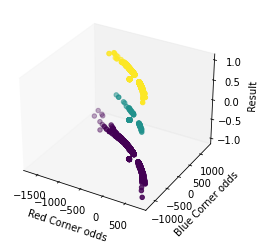

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = df["R_odds"]
y = df["B_odds"]
z = df["Num result"]
ax.scatter(x, y, z, c=z, cmap = "viridis")
ax.set_xlabel('Red Corner odds')
ax.set_ylabel('Blue Corner odds')
ax.set_zlabel('Result')
ax.grid(False)


In general, the betting favorite wins, given that there are more purple points. As a fight fan, it would be interesting to watch fights that correspond to yellow points as those points correspond to upsets. Specifically, the fights on the tail ends of each color would be the most interesting.

## Summary

Using python, I explored the dataset containing betting odds and outcomes of a fight. I also looked at the demographics of  UFC events from weightclass to host locations. Lastly, I built a linear regression model to predict betting odds.



## References

* What is the source of your dataset(s)?

"https://www.kaggle.com/datasets/mdabbert/ufc-fights-2010-2020-with-betting-odds"

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.

https://altair-viz.github.io/altair-tutorial/notebooks/08-Configuration.html Adding title to Charts

* List other references that you found helpful.

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html 3d Plotting 

https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

https://likegeeks.com/3d-plotting-in-python/#Modifying_the_axes_limits_and_ticks

https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/



https://www.actionnetwork.com/education/american-odds Explaining betting odds

https://www.sportsbettingdime.com/guides/betting-101/how-bookmakers-generate-odds/ How odds are generated

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a04f08c-4f34-47bc-a029-6993505183b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>